In [63]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import tqdm

In [64]:
import os
import shutil
import random

# Set the path to your data directory
data_dir = "data/Sign Language for Numbers"

# Set the ratio of data to be used for training (e.g., 80%)
train_ratio = 0.8

# Create directories for train and test data
train_dir = os.path.join("train_test", "train")
test_dir = os.path.join("train_test", "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [3]:
# # Iterate over each class directory
# for class_name in tqdm.tqdm(os.listdir(data_dir)):
#     class_dir = os.path.join(data_dir, class_name)
#     if os.path.isdir(class_dir):
#         # Get list of image files in the class directory
#         image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
#         # Shuffle the list of image files
#         random.shuffle(image_files)
#         # Calculate the number of images for training
#         num_train = int(train_ratio * len(image_files))
#         # Split the images into train and test sets
#         train_images = image_files[:num_train]
#         test_images = image_files[num_train:]
#         # Copy images to train directory
#         for image in train_images:
#             src = os.path.join(class_dir, image)w
#             dst = os.path.join(train_dir, class_name, image)
#             os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
#             shutil.copy(src, dst)
#         # Copy images to test directory
#         for image in test_images:
#             src = os.path.join(class_dir, image)
#             dst = os.path.join(test_dir, class_name, image)
#             os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
#             shutil.copy(src, dst)

In [4]:
image_files = glob.glob("train_test/train/*/*.jpg")
image_files = [(int(f.split("\\")[1]), f) for f in image_files]
df = pd.DataFrame(image_files, columns=["label", "path"])
df.sample(10)

,label,path
8441,7,train_test/train\7\seven_1047.jpg
1470,1,train_test/train\1\one_1303.jpg
6557,5,train_test/train\5\five_29.jpg
8810,7,train_test/train\7\seven_1463.jpg
4437,3,train_test/train\3\three_586.jpg
5025,4,train_test/train\4\four_1259.jpg
7390,6,train_test/train\6\six_1215.jpg
7742,6,train_test/train\6\six_261.jpg
2699,2,train_test/train\2\two_1334.jpg
8219,6,train_test/train\6\six_799.jpg


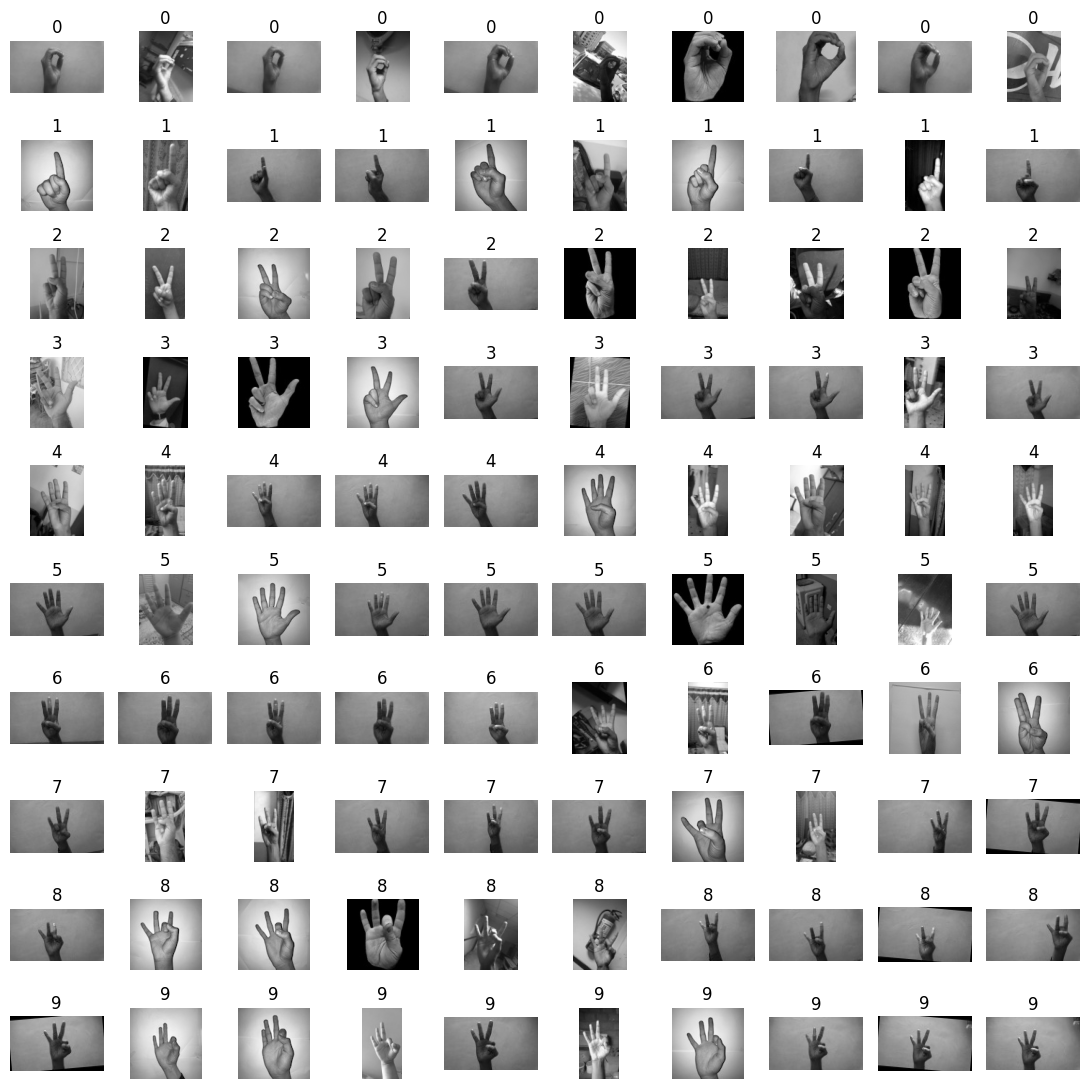

In [5]:
# Initialize an empty dictionary to store fashion samples for each class
sign_samples = {}

# Iterate over each fashion class (0 to 9)
for i in range(10):
    # Find the indices of training samples belonging to the current fashion class
    indices = df[df["label"] == i].index
    # Randomly select 10 samples from the current fashion class without replacement
    sign_samples[i] = np.random.choice(indices, 10, replace=False)

plt.figure(figsize=(11,11))
# Iterate over each fashion class and its corresponding samples
for i in range(100):
    plt.subplot(10, 10, i + 1)
    # Display the image corresponding to the fashion sample
    
    image = cv2.imread(df.loc[sign_samples[i // 10][i % 10],"path"])
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap=plt.cm.binary)
    # Set the title of the subplot to the name of the fashion class
    plt.title(df.loc[sign_samples[i // 10][i % 10],"label"])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# # Initialize lists to store heights and widths
# heights = []
# widths = []

# # Iterate through each image in the directory
# for image_path in tqdm.tqdm(df["path"]):
#     # Read the image using OpenCV
#     image = cv2.imread(image_path)
#     # Get the height and width of the image
#     height, width, _ = image.shape
#     heights.append(height)
#     widths.append(width)

# # Plot the distribution of heights
# plt.figure(figsize=(5, 3))
# plt.hist(heights, bins=30, color='blue', alpha=0.7)
# plt.title('Height Distribution of Images')
# plt.xlabel('Height')
# plt.ylabel('Frequency')
# plt.grid(alpha=0.25)
# plt.show()

# # Plot the distribution of widths
# plt.figure(figsize=(5, 3))
# plt.hist(widths, bins=30, color='green', alpha=0.7)
# plt.title('Width Distribution of Images')
# plt.xlabel('Width')
# plt.ylabel('Frequency')
# plt.grid(alpha=0.25)
# plt.show()

In [48]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD

# Set the path to your data directory
train_dir = "train_test/train"
test_dir = "train_test/test"

# Set the input size required by ResNet50
input_size = (64, 64)
batch_size = 64

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    # color_mode='grayscale'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    # color_mode='grayscale'
)

Found 12000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [66]:

# Set the path to your data directory
train_dir = "train_test/train"
test_dir = "train_test/test"

# Data augmentation and preprocessing
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Provide the path to your dataset
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb',  # Set color mode to RGB
    subset='training'  # Specify training subset
)

# Validation data generator using the same ImageDataGenerator
validation_generator = data_generator.flow_from_directory(
    train_dir,  # Same directory as training data
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb',  # Set color mode to RGB
    subset='validation'  # Specify validation subset
)

Found 9600 images belonging to 10 classes.
Found 2400 images belonging to 10 classes.


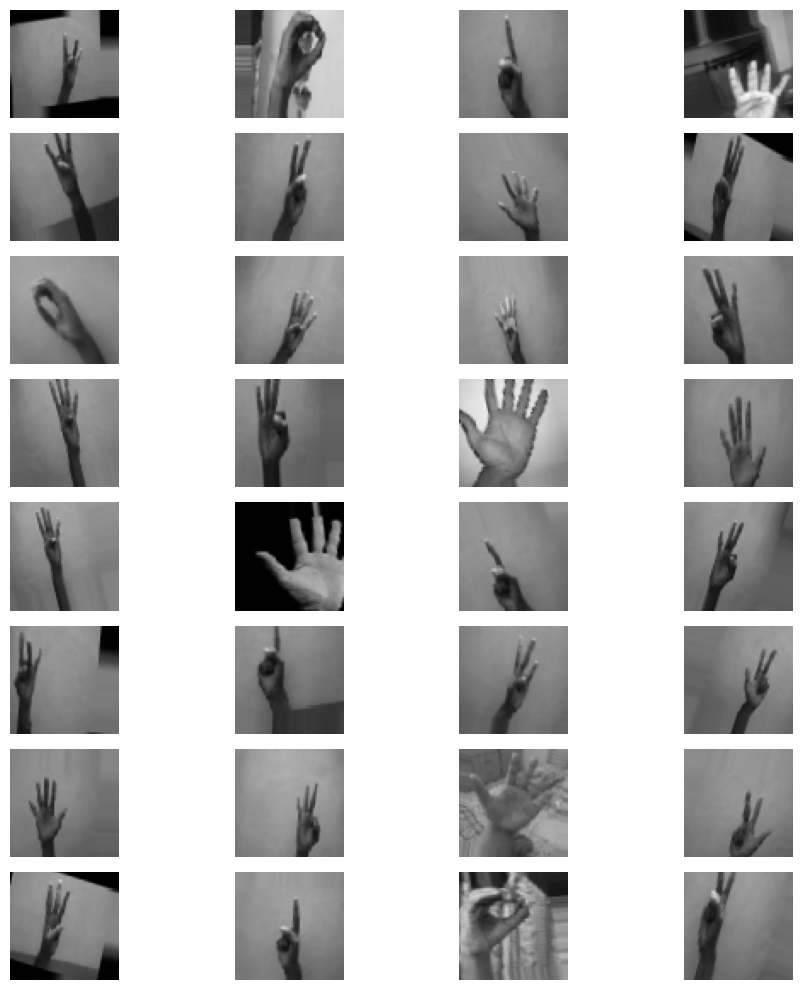

In [67]:
# Wrap the test generator with tqdm for progress visualization
for test_data, test_labels in validation_generator:
    # Unnormalize the test data by multiplying by 255
    test_data *= 255.0
    
    # Plot 36 images in a 6x6 grid
    plt.figure(figsize=(10, 10))
    for i in range(32):
        plt.subplot(8, 4, i + 1)
        plt.imshow(test_data[i].astype('uint8'))  # Convert to uint8 for correct plotting
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    break

## **Model Selection and Training**

In [100]:
# Import necessary libraries
import numpy as np  # For numerical operations
import tqdm  # For progress bars
import warnings  # For filtering warnings
from keras.models import Sequential  # For building sequential models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout  # Different layers for building the model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint  # Callbacks for model training
from keras.optimizers import Adam, RMSprop  # Optimizers for training the model
import keras_tuner  # For hyperparameter tuning
from tensorflow.keras.applications import MobileNet  # Pre-trained MobileNet model
from tensorflow.keras.regularizers import l2  # L2 regularization for the model

# Filter warnings to ignore them during runtime
warnings.filterwarnings("ignore")


#### **Vanilla CNN - Hyperparameter Tuning**

In [119]:

# Set the path to your data directory
train_dir = "train_test/train"
test_dir = "train_test/test"

# Data augmentation and preprocessing
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Provide the path to your dataset
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',  # Set color mode to RGB
    subset='training'  # Specify training subset
)

# Validation data generator using the same ImageDataGenerator
validation_generator = data_generator.flow_from_directory(
    train_dir,  # Same directory as training data
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',  # Set color mode to RGB
    subset='validation'  # Specify validation subset
)

Found 9600 images belonging to 10 classes.
Found 2400 images belonging to 10 classes.


In [120]:
# Define the function to create the model
def create_model(hp):
    
    # Create a Sequential model
    model = Sequential()
    
    # Add Convolutional layers with variable number of filters chosen from the hyperparameter 'filters1', 'filters2', 'filters3'
    model.add(Conv2D(hp.Choice('filters1', [16, 32]), (2,2), input_shape=(64, 64, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Conv2D(hp.Choice('filters2', [32, 64]), (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), padding='same'))
    model.add(Conv2D(hp.Choice('filters3', [64, 128]), (5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5,5), padding='same'))
    
    # Flatten layer to transition from convolutional to fully connected layers
    model.add(Flatten())
    
    # Add Dense layers with variable number of units chosen from the hyperparameter 'n_units'
    model.add(Dense(hp.Choice('n_units', [128, 256]), activation='relu'))
    
    # Dropout layer to prevent overfitting
    model.add(Dropout(0.2))
    
    # Output layer with 10 units for multi-class classification
    model.add(Dense(10, activation='softmax'))
    
    # Choose optimizer from 'adam' or 'rmsprop' based on the hyperparameter 'optimizer'
    optimizer = hp.Choice('optimizer', ["adam", "rmsprop"])
    if optimizer == 'adam': opt = Adam()
    else: opt = RMSprop()
    
    # Compile the model with categorical crossentropy loss and the chosen optimizer
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # Return the compiled model
    return model

In [121]:
# Initialize a RandomSearch tuner from the keras_tuner module
tuner = keras_tuner.RandomSearch(
    create_model,  # The function to create the model
    objective='val_loss',  # The metric to optimize (minimize)
    max_trials=5  # The maximum number of hyperparameter combinations to try
)

Reloading Tuner from .\untitled_project\tuner0.json


In [122]:
# Initialize empty lists to store batches of samples from the train and validation generators
train_batch_x = []  # List to store input features from the train generator
train_batch_y = []  # List to store labels from the train generator
valid_batch_x = []  # List to store input features from the validation generator
valid_batch_y = []  # List to store labels from the validation generator

# Iterate over batches of samples from the train generator
for i in tqdm.tqdm(range(len(train_generator))):
    # Get a batch of samples from the train generator
    batch = train_generator.__getitem__(i)
    # Append input features and labels to the respective lists
    train_batch_x.append(batch[0])
    train_batch_y.append(batch[1])

# Iterate over batches of samples from the validation generator
for i in tqdm.tqdm(range(len(validation_generator))):
    # Get a batch of samples from the validation generator
    batch = validation_generator.__getitem__(i)
    # Append input features and labels to the respective lists
    valid_batch_x.append(batch[0])
    valid_batch_y.append(batch[1])

100%|██████████| 38/38 [00:01<00:00, 32.26it/s]


In [123]:
# Select a subset of samples from the training set for hyperparameter tuning
X_train_sample = np.array(train_batch_x[:-1]).reshape(-1, 64, 64, 1)[::5]  # Extract input features and reshape
y_train_sample = np.array(train_batch_y[:-1]).reshape(-1, 10)[::5]  # Extract labels and reshape
print(X_train_sample.shape, y_train_sample.shape)  # Print the shape of the selected training samples

# Select a subset of samples from the validation set for hyperparameter tuning
X_valid_sample = np.array(valid_batch_x[:-1]).reshape(-1, 64, 64, 1)[::5]  # Extract input features and reshape
y_valid_sample = np.array(valid_batch_y[:-1]).reshape(-1, 10)[::5]  # Extract labels and reshape
print(X_valid_sample.shape, y_valid_sample.shape)  # Print the shape of the selected validation samples

(1908, 64, 64, 1) (1908, 10)
(474, 64, 64, 1) (474, 10)


In [124]:
# Perform hyperparameter tuning using the RandomSearch tuner
tuner.search(
    X_train_sample,  # Input features of the training samples
    y_train_sample,  # Labels of the training samples
    epochs=10,  # Number of epochs for training
    validation_data=(X_valid_sample, y_valid_sample)  # Validation data for model evaluation
)

In [125]:
# Create a model using the best hyperparameters found by the tuner
model1 = create_model(tuner.get_best_hyperparameters(1)[0])

# Print the summary of the created model
model1.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 63, 63, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 30, 30, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 6, 6, 128)      │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,146 (941.98 KB)

 Trainable params: 241,146 (941.98 KB)

 Non-trainable params: 0 (0.00 B)

#### **Vanilla CNN - Training**

In [126]:
# Define EarlyStopping callback to stop training if validation loss stops improving
early_stoping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0.001,  # Minimum change in validation loss to be considered an improvement
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore the model weights to the best observed during training
    verbose=0  # Set to 1 for verbose output
)

# Define ReduceLROnPlateau callback to adjust learning rate if validation accuracy plateaus
reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=2,  # Number of epochs with no improvement after which learning rate will be reduced
    factor=0.5,  # Factor by which the learning rate will be reduced
    verbose=1  # Set to 1 for verbose output
)

# Define ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint(
    'checkpoints/vanilla/checkpoint.keras',  # Path to save the checkpoint
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model based on the monitored quantity
    mode='min',  # Set to 'min' to save the model with the minimum monitored quantity (validation loss)
    verbose=1  # Set to 1 for verbose output
)

In [127]:
# Train the model (model1) using fit method
history_model1 = model1.fit(
    train_generator,  # Training data generator
    validation_data=validation_generator,  # Validation data generator
    epochs=50,  # Number of epochs for training
    callbacks=[early_stoping, reduce_learning_rate, checkpoint],  # List of callbacks for monitoring and adjustments during training
    verbose=1  # Set to 1 for verbose output during training
)

Epoch 1/50
148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0979 - loss: 2.3023
Epoch 1: val_loss improved from inf to 2.36695, saving model to checkpoints/vanilla/checkpoint.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.0982 - loss: 2.3021 - val_accuracy: 0.0996 - val_loss: 2.3670 - learning_rate: 0.0010
Epoch 2/50
149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1998 - loss: 2.1583
Epoch 2: val_loss improved from 2.36695 to 2.19522, saving model to checkpoints/vanilla/checkpoint.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.2001 - loss: 2.1577 - val_accuracy: 0.2125 - val_loss: 2.1952 - learning_rate: 0.0010
Epoch 3/50
148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3358 - loss: 1.8735
Epoch 3: val_loss improved from 2.19522 to 1.77147, saving model to checkpoints/vanilla/checkpoint.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.3362 - loss: 1.8721 - val_accuracy: 0.3854 - val_loss: 1.7715 - learning_rate: 0.0010
Ep

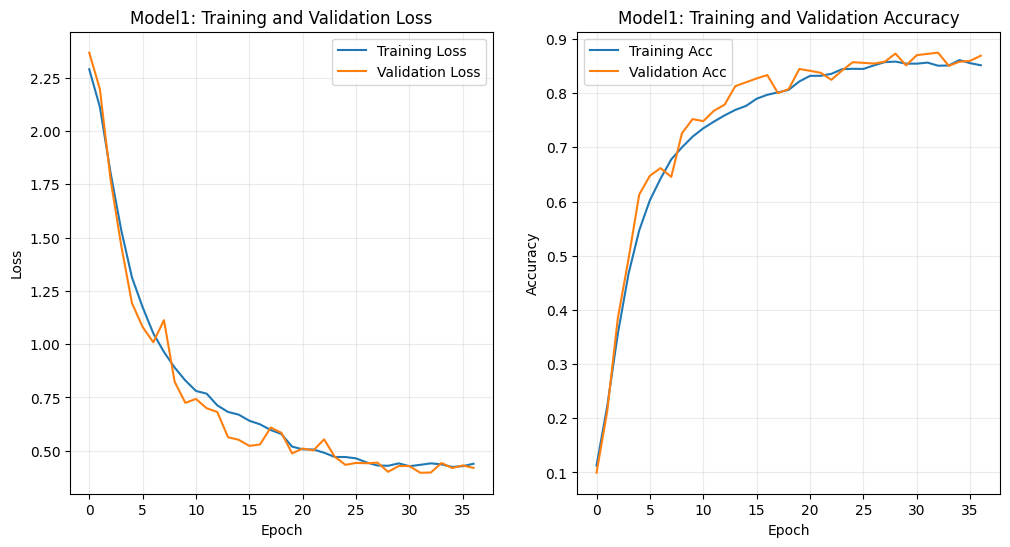

In [128]:
train_loss = history_model1.history['loss']
val_loss = history_model1.history['val_loss']
train_acc = history_model1.history['accuracy']
val_acc = history_model1.history['val_accuracy']

# Plotting loss and accuracy curves
plt.figure(figsize=(12, 6))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model1: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.25)

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Model1: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.25)

#### **MobileNet - Training Top Layer**

In [129]:
# Set the path to your data directory
train_dir = "train_test/train"
test_dir = "train_test/test"

# Data augmentation and preprocessing
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Provide the path to your dataset
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb',  # Set color mode to RGB
    subset='training'  # Specify training subset
)

# Validation data generator using the same ImageDataGenerator
validation_generator = data_generator.flow_from_directory(
    train_dir,  # Same directory as training data
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb',  # Set color mode to RGB
    subset='validation'  # Specify validation subset
)

Found 9600 images belonging to 10 classes.
Found 2400 images belonging to 10 classes.


In [130]:
# Load MobileNet model pretrained on ImageNet dataset
base_model = MobileNet(
    weights='imagenet',  # Use pre-trained weights from ImageNet
    include_top=False,  # Exclude the fully connected layers at the top
    input_shape=(64, 64, 3),  # Input shape of the images (64x64 pixels with 3 channels)
    alpha=1.0  # Width multiplier for the MobileNet architecture
)

# Add custom top layers for classification on top of the MobileNet base
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer to reduce spatial dimensions
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)  # Fully connected layer with ReLU activation and L2 regularization
predictions = Dense(10, activation='softmax')(x)  # Output layer with softmax activation for 10 classes

# Create the model by specifying input and output layers
model2 = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the MobileNet base if needed
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [131]:
# Define EarlyStopping callback to stop training if validation loss stops improving
early_stoping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0.001,  # Minimum change in validation loss to be considered an improvement
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore the model weights to the best observed during training
    verbose=0  # Set to 1 for verbose output
)

# Define ReduceLROnPlateau callback to adjust learning rate if validation accuracy plateaus
reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=2,  # Number of epochs with no improvement after which learning rate will be reduced
    factor=0.5,  # Factor by which the learning rate will be reduced
    verbose=1  # Set to 1 for verbose output
)

# Define ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint(
    'checkpoints/mobilenet/checkpoint.keras',  # Path to save the checkpoint
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model based on the monitored quantity
    mode='min',  # Set to 'min' to save the model with the minimum monitored quantity (validation loss)
    verbose=1  # Set to 1 for verbose output
)

In [132]:
# Train the model with frozen base layers for 2 epochs
history_model2 = model2.fit(
    train_generator,  # Training data generator
    validation_data=validation_generator,  # Validation data generator
    epochs=2,  # Number of epochs for training
    callbacks=[early_stoping, reduce_learning_rate, checkpoint],  # List of callbacks for monitoring and adjustments during training
    verbose=1  # Set to 1 for verbose output during training
)

Epoch 1/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3929 - loss: 2.1912
Epoch 1: val_loss improved from inf to 1.60354, saving model to checkpoints/mobilenet/checkpoint.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.3936 - loss: 2.1891 - val_accuracy: 0.5633 - val_loss: 1.6035 - learning_rate: 0.0010
Epoch 2/2
149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6129 - loss: 1.4757
Epoch 2: val_loss improved from 1.60354 to 1.47289, saving model to checkpoints/mobilenet/checkpoint.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.6130 - loss: 1.4752 - val_accuracy: 0.5904 - val_loss: 1.4729 - learning_rate: 0.0010


#### **MobileNet - Fine-Tuning All Layers**

In [133]:
# Set all layers of the base model to be trainable for fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# Compile the model after fine-tuning
model2.compile(
    optimizer=Adam(),  # Optimizer for training
    loss='categorical_crossentropy',  # Loss function for optimization
    metrics=['accuracy']  # Metrics to monitor during training
)

In [134]:
# Fine-tune the model with trainable base layers
history_model2_ = model2.fit(
    train_generator,  # Training data generator
    validation_data=validation_generator,  # Validation data generator
    epochs=50,  # Number of epochs for fine-tuning
    callbacks=[early_stoping, reduce_learning_rate, checkpoint],  # List of callbacks for monitoring and adjustments during training
    verbose=1  # Set to 1 for verbose output during training
)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.5278 - loss: 1.8289
Epoch 1: val_loss did not improve from 1.47289
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 178ms/step - accuracy: 0.5286 - loss: 1.8256 - val_accuracy: 0.4625 - val_loss: 3.1383 - learning_rate: 0.0010
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.8246 - loss: 0.7861
Epoch 2: val_loss improved from 1.47289 to 1.24590, saving model to checkpoints/mobilenet/checkpoint.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 184ms/step - accuracy: 0.8246 - loss: 0.7859 - val_accuracy: 0.6783 - val_loss: 1.2459 - learning_rate: 0.0010
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8754 - loss: 0.5826
Epoch 3: val_loss improved from 1.24590 to 1.00904, saving model to checkpoints/mobilenet/checkpoint.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 29s 192ms/step - accuracy: 0.8755 - loss: 0.5824 - val_accuracy: 0.7708 - val_loss: 1.0090 - learning_rate: 0.0010
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 

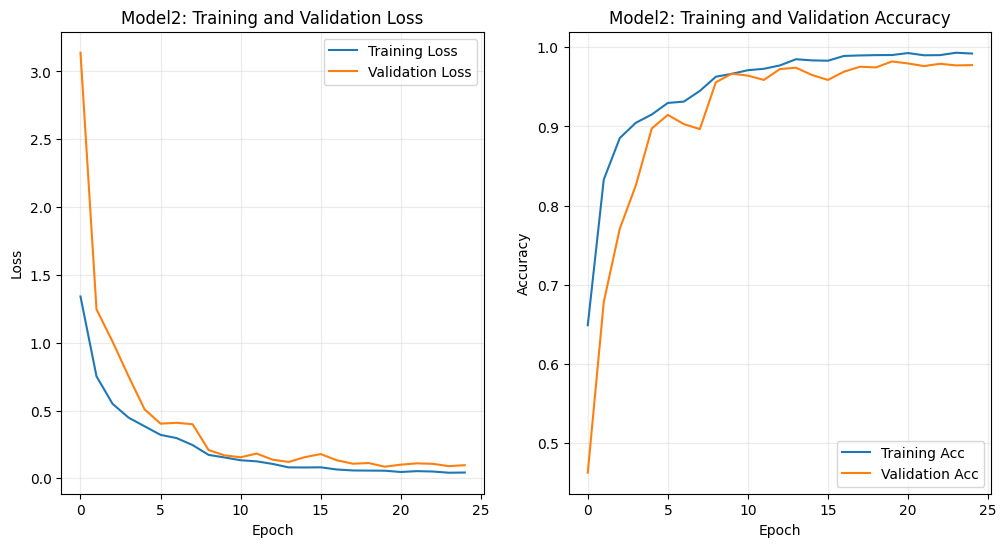

In [135]:
train_loss = history_model2_.history['loss']
val_loss = history_model2_.history['val_loss']
train_acc = history_model2_.history['accuracy']
val_acc = history_model2_.history['val_accuracy']

# Plotting loss and accuracy curves
plt.figure(figsize=(12, 6))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model2: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.25)

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Model2: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.25)

## **Model Evaluation**

In [162]:
from keras.models import load_model  # For loading pre-trained models
from sklearn.metrics import confusion_matrix

#### **Vanilla CNN - Testing**

In [177]:
# Set the path to your data directory
test_dir = "train_test/test"

# Data augmentation and preprocessing
test_data_generator = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest',
)

# Provide the path to your dataset
test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',  # Set color mode to RGB
)

Found 3000 images belonging to 10 classes.


In [178]:
# Load the best model checkpoints
best_model1 = load_model("checkpoints/vanilla/checkpoint.keras")

# Compile the model with additional metrics
best_model1.compile(
    optimizer=Adam(),  # Optimizer for training
    loss='categorical_crossentropy',  # Loss function for optimization
    metrics=['accuracy', 'precision', 'recall', 'f1_score']  # Metrics to monitor during training
)

In [179]:
# Evaluate the model
loss_values = []
accuracy_values = []
precision_values = []
recall_values = []
f1_score_values = []
counter = 0

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Wrap the test generator with tqdm for progress visualization
for test_data, test_labels in tqdm.tqdm(test_generator):
    
    if counter == len(test_generator):
        break
    
    predictions = best_model1.predict(test_data)
    
    # Convert one-hot encoded labels to class indices
    true_labels_batch = np.argmax(test_labels, axis=1)
    predicted_labels_batch = np.argmax(predictions, axis=1)
    
    # Append true labels and predicted labels for the current batch to the lists
    true_labels.extend(true_labels_batch)
    predicted_labels.extend(predicted_labels_batch)
    
    # Compute metrics for the current batch
    loss, accuracy, precision, recall, f1_score = best_model1.evaluate(test_data, test_labels, verbose=0)
    
    # Append metrics for the current batch to lists
    loss_values.append(loss)
    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_score_values.append(f1_score)
    counter += 1

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Compute the average metrics over all batches
avg_loss = np.mean(loss_values)
avg_accuracy = np.mean(accuracy_values)
avg_precision = np.mean(precision_values)
avg_recall = np.mean(recall_values)
avg_f1_score = np.mean(f1_score_values)

print('\nAverage Loss      :', round(avg_loss, 4))
print('Average Accuracy  :', round(avg_accuracy, 4))
print('Average Precision :', round(avg_precision, 4))
print('Average Recall    :', round(avg_recall, 4))
print('Average F1 Score  :', round(avg_f1_score, 4))
# Print the overall confusion matrix
print("\nOverall Confusion Matrix:\n")
print(conf_matrix)

  0%|          | 0/47 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 1/47 [00:01<00:47,  1.03s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 2/47 [00:01<00:24,  1.82it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  6%|▋         | 3/47 [00:01<00:17,  2.52it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


  9%|▊         | 4/47 [00:01<00:13,  3.08it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 5/47 [00:02<00:13,  3.05it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


 13%|█▎        | 6/47 [00:02<00:12,  3.40it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 15%|█▍        | 7/47 [00:02<00:10,  3.74it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 17%|█▋        | 8/47 [00:02<00:10,  3.74it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▉        | 9/47 [00:02<00:09,  3.90it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 21%|██▏       | 10/47 [00:03<00:09,  4.10it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 23%|██▎       | 11/47 [00:03<00:08,  4.44it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 26%|██▌       | 12/47 [00:03<00:07,  4.83it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 28%|██▊       | 13/47 [00:03<00:06,  5.02it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


 30%|██▉       | 14/47 [00:03<00:06,  5.28it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


 32%|███▏      | 15/47 [00:04<00:05,  5.45it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 34%|███▍      | 16/47 [00:04<00:05,  5.49it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 36%|███▌      | 17/47 [00:04<00:05,  5.49it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


 38%|███▊      | 18/47 [00:04<00:05,  5.49it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 19/47 [00:04<00:04,  5.64it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


 43%|████▎     | 20/47 [00:04<00:04,  5.59it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 45%|████▍     | 21/47 [00:05<00:04,  5.56it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 47%|████▋     | 22/47 [00:05<00:04,  5.50it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


 49%|████▉     | 23/47 [00:05<00:04,  5.44it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 51%|█████     | 24/47 [00:05<00:04,  5.45it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 53%|█████▎    | 25/47 [00:05<00:04,  5.44it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 55%|█████▌    | 26/47 [00:06<00:03,  5.57it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


 57%|█████▋    | 27/47 [00:06<00:03,  5.66it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


 60%|█████▉    | 28/47 [00:06<00:03,  5.49it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


 62%|██████▏   | 29/47 [00:06<00:03,  5.29it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


 64%|██████▍   | 30/47 [00:06<00:03,  5.04it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 66%|██████▌   | 31/47 [00:06<00:03,  5.25it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


 68%|██████▊   | 32/47 [00:07<00:02,  5.32it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


 70%|███████   | 33/47 [00:07<00:02,  5.36it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 72%|███████▏  | 34/47 [00:07<00:02,  5.09it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 74%|███████▍  | 35/47 [00:07<00:02,  4.19it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


 77%|███████▋  | 36/47 [00:08<00:02,  4.47it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 79%|███████▊  | 37/47 [00:08<00:02,  4.52it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|████████  | 38/47 [00:08<00:01,  4.55it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 83%|████████▎ | 39/47 [00:08<00:01,  4.59it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 40/47 [00:08<00:01,  4.56it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 87%|████████▋ | 41/47 [00:09<00:01,  4.59it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 89%|████████▉ | 42/47 [00:09<00:01,  4.53it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


 91%|█████████▏| 43/47 [00:09<00:00,  4.59it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 94%|█████████▎| 44/47 [00:09<00:00,  4.57it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 96%|█████████▌| 45/47 [00:10<00:00,  4.70it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


 98%|█████████▊| 46/47 [00:10<00:00,  4.68it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


100%|██████████| 47/47 [00:11<00:00,  4.27it/s]


Average Loss      : 0.2789
Average Accuracy  : 0.912
Average Precision : 0.9422
Average Recall    : 0.895
Average F1 Score  : 0.9048

Overall Confusion Matrix:

[[293   0   1   0   2   1   3   0   0   0]
 [  5 281   5   1   1   0   4   0   1   2]
 [  1  11 259   4   3   0  13   8   0   1]
 [  0   0   1 275   2   3   0   2   1  16]
 [  1   0   3   0 260   4  28   1   0   3]
 [  0   0   0   0   0 300   0   0   0   0]
 [  1   0  10   3  20   0 261   5   0   0]
 [  0   1   4   2  13   0   7 266   6   1]
 [  4   4   2   3   1   2   3   9 258  14]
 [  0   1   2   0   5   4   0   2   3 283]]


#### **MobileNet - Testing**

In [168]:
# Set the path to your data directory
test_dir = "train_test/test"

# Data augmentation and preprocessing
test_data_generator = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest',
)

# Provide the path to your dataset
test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb',  # Set color mode to RGB
)

Found 3000 images belonging to 10 classes.


In [169]:
# Load the best model checkpoints
best_model2 = load_model("checkpoints/mobilenet/checkpoint.keras")

# Compile the model with additional metrics
best_model2.compile(
    optimizer=Adam(),  # Optimizer for training
    loss='categorical_crossentropy',  # Loss function for optimization
    metrics=['accuracy', 'precision', 'recall', 'f1_score']  # Metrics to monitor during training
)

In [173]:
# Evaluate the model
loss_values = []
accuracy_values = []
precision_values = []
recall_values = []
f1_score_values = []
counter = 0

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Wrap the test generator with tqdm for progress visualization
for test_data, test_labels in tqdm.tqdm(test_generator):
    
    if counter == len(test_generator):
        break
    
    predictions = best_model2.predict(test_data)
    
    # Convert one-hot encoded labels to class indices
    true_labels_batch = np.argmax(test_labels, axis=1)
    predicted_labels_batch = np.argmax(predictions, axis=1)
    
    # Append true labels and predicted labels for the current batch to the lists
    true_labels.extend(true_labels_batch)
    predicted_labels.extend(predicted_labels_batch)
    
    # Compute metrics for the current batch
    loss, accuracy, precision, recall, f1_score = best_model2.evaluate(test_data, test_labels, verbose=0)
    
    # Append metrics for the current batch to lists
    loss_values.append(loss)
    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_score_values.append(f1_score)
    counter += 1

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Compute the average metrics over all batches
avg_loss = np.mean(loss_values)
avg_accuracy = np.mean(accuracy_values)
avg_precision = np.mean(precision_values)
avg_recall = np.mean(recall_values)
avg_f1_score = np.mean(f1_score_values)

print('\nAverage Loss      :', round(avg_loss, 4))
print('Average Accuracy  :', round(avg_accuracy, 4))
print('Average Precision :', round(avg_precision, 4))
print('Average Recall    :', round(avg_recall, 4))
print('Average F1 Score  :', round(avg_f1_score, 4))
# Print the overall confusion matrix
print("\nOverall Confusion Matrix:\n")
print(conf_matrix)

  0%|          | 0/47 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  2%|▏         | 1/47 [00:00<00:14,  3.11it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  4%|▍         | 2/47 [00:00<00:15,  2.96it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  6%|▋         | 3/47 [00:01<00:15,  2.79it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  9%|▊         | 4/47 [00:01<00:16,  2.54it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 11%|█         | 5/47 [00:01<00:16,  2.57it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 13%|█▎        | 6/47 [00:02<00:16,  2.56it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 15%|█▍        | 7/47 [00:02<00:15,  2.57it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 17%|█▋        | 8/47 [00:03<00:15,  2.56it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 19%|█▉        | 9/47 [00:03<00:14,  2.55it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 21%|██▏       | 10/47 [00:03<00:14,  2.55it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 23%|██▎       | 11/47 [00:04<00:14,  2.54it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 26%|██▌       | 12/47 [00:04<00:13,  2.58it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 28%|██▊       | 13/47 [00:04<00:12,  2.63it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 30%|██▉       | 14/47 [00:05<00:12,  2.61it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 32%|███▏      | 15/47 [00:05<00:12,  2.59it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 34%|███▍      | 16/47 [00:06<00:11,  2.61it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 36%|███▌      | 17/47 [00:06<00:11,  2.61it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 38%|███▊      | 18/47 [00:06<00:10,  2.71it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 40%|████      | 19/47 [00:07<00:10,  2.77it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 43%|████▎     | 20/47 [00:07<00:09,  2.84it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 45%|████▍     | 21/47 [00:07<00:09,  2.61it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 47%|████▋     | 22/47 [00:08<00:09,  2.74it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 49%|████▉     | 23/47 [00:08<00:08,  2.79it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 51%|█████     | 24/47 [00:09<00:08,  2.79it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 53%|█████▎    | 25/47 [00:09<00:08,  2.66it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 55%|█████▌    | 26/47 [00:09<00:07,  2.65it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 57%|█████▋    | 27/47 [00:10<00:07,  2.62it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 60%|█████▉    | 28/47 [00:10<00:07,  2.68it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 62%|██████▏   | 29/47 [00:10<00:06,  2.66it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 64%|██████▍   | 30/47 [00:11<00:06,  2.72it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 66%|██████▌   | 31/47 [00:11<00:05,  2.77it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 68%|██████▊   | 32/47 [00:11<00:05,  2.84it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 70%|███████   | 33/47 [00:12<00:04,  2.89it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 72%|███████▏  | 34/47 [00:12<00:04,  2.93it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 74%|███████▍  | 35/47 [00:12<00:04,  2.95it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 77%|███████▋  | 36/47 [00:13<00:03,  2.93it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 79%|███████▊  | 37/47 [00:13<00:03,  2.95it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 81%|████████  | 38/47 [00:14<00:03,  2.87it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 83%|████████▎ | 39/47 [00:14<00:02,  2.80it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 85%|████████▌ | 40/47 [00:14<00:02,  2.79it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 87%|████████▋ | 41/47 [00:15<00:02,  2.85it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 89%|████████▉ | 42/47 [00:15<00:01,  2.90it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 91%|█████████▏| 43/47 [00:15<00:01,  2.85it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 94%|█████████▎| 44/47 [00:16<00:01,  2.96it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 96%|█████████▌| 45/47 [00:16<00:00,  2.96it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 98%|█████████▊| 46/47 [00:16<00:00,  2.89it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


100%|██████████| 47/47 [00:17<00:00,  2.73it/s]


Average Loss      : 0.0476
Average Accuracy  : 0.993
Average Precision : 0.994
Average Recall    : 0.9916
Average F1 Score  : 0.9899

Overall Confusion Matrix:

[[290   0   0   0   0   0   0   0   0   0]
 [  0 291   0   0   0   0   0   0   0   0]
 [  0   0 297   0   0   0   2   0   0   0]
 [  0   0   0 296   0   0   0   0   0   1]
 [  0   0   0   0 301   0   0   3   0   0]
 [  0   0   0   0   0 299   0   0   0   0]
 [  0   0   0   1   0   1 304   1   0   0]
 [  0   0   1   1   0   0   1 298   2   0]
 [  1   1   0   0   0   0   0   2 304   2]
 [  0   0   0   0   0   0   1   0   0 299]]
